<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Awesome-pytorch-list/blob/master/Complex_Inception_Architecture_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [4]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preparatin using ImageDataGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
WIDTH=224
HEIGHT=224

In [7]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=20,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [8]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [9]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [10]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

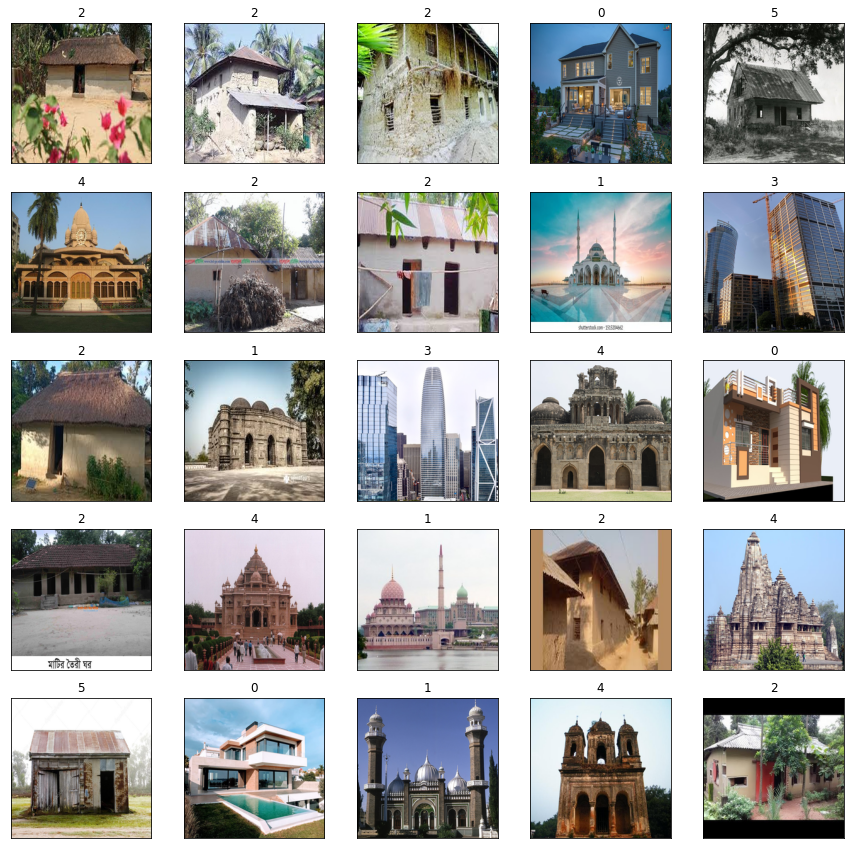

In [12]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

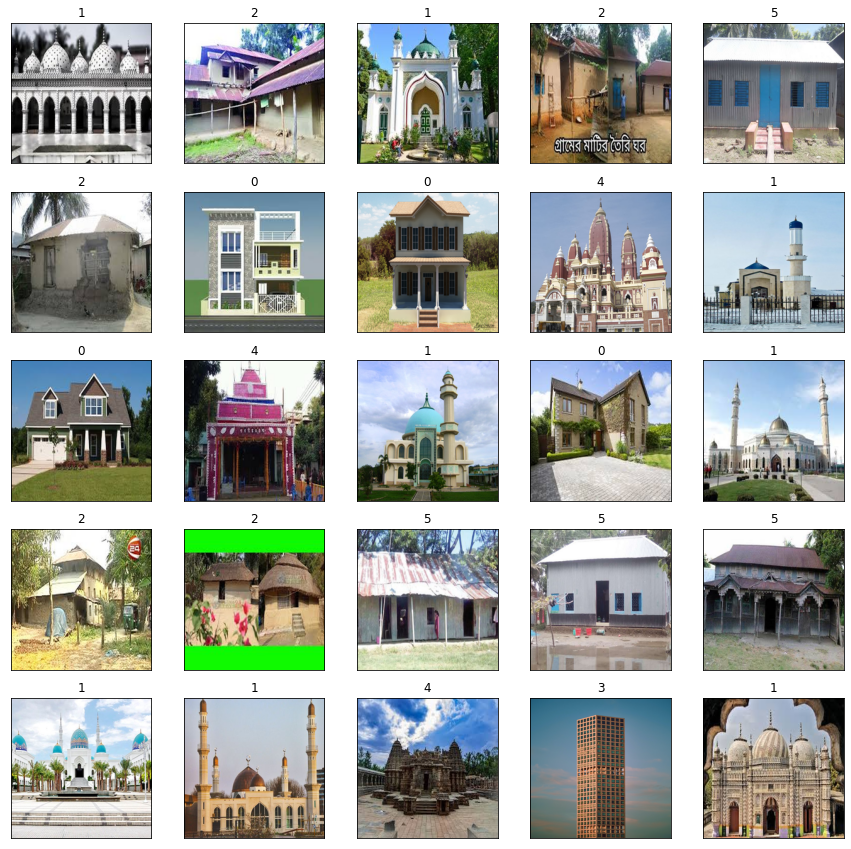

In [13]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Library

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import concatenate

## Create Inception Block

In [15]:
def inception_block(layer_input,f1,f2,f3):
    #1x1 conv
    conv1=Conv2D(f1,(1,1),activation='relu',padding='same')(layer_input)
    #3x3 conv
    conv3=Conv2D(f2,(3,3), activation='relu',padding='same')(layer_input)
    #5x5 conv
    conv5=Conv2D(f3,(5,5),activation='relu',padding='same')(layer_input)
    # 3x3 maxpooling
    pool=MaxPooling2D((3,3),strides=(1,1),padding='same')(layer_input)
    
    # concatenate filters
    layer_out=concatenate([conv1,conv3,conv5,pool],axis=-1)
    return layer_out

## Define Simple Inception Model

In [16]:
"""
input_shape=(224,224,224)
model_input=Input(shape=(input_shape))
"""


'\ninput_shape=(224,224,224)\nmodel_input=Input(shape=(input_shape))\n'

In [17]:
"""
layer=inception_block(model_input,64,128,32)
layer
"""


'\nlayer=inception_block(model_input,64,128,32)\nlayer\n'

In [18]:
"""
model=Model(inputs=model_input,outputs=layer)
model.summary()
"""

'\nmodel=Model(inputs=model_input,outputs=layer)\nmodel.summary()\n'

In [19]:
#plot_model(model,show_shapes=True,to_file='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception.png')

## Define Complex Inception Function

In [20]:
def inception_function(layer_input,f1,f2_in,f2_out,f3_in,f3_out,f4_out):
    #1x1 conv
    conv1=Conv2D(f1,(1,1),activation='relu',padding='same')(layer_input)
    #3x3 conv
    conv3=Conv2D(f2_in,(3,3), activation='relu',padding='same')(layer_input)
    conv3=Conv2D(f2_out,(3,3), activation='relu',padding='same')(conv3)
    #5x5 conv
    conv5=Conv2D(f3_in,(5,5),activation='relu',padding='same')(layer_input)
    conv5=Conv2D(f3_out,(5,5),activation='relu',padding='same')(conv5)
    # 3x3 maxpooling
    pool=MaxPooling2D((3,3),strides=(1,1),padding='same')(layer_input)
    pool=Conv2D(f4_out,(1,1),strides=(1,1),padding='same')(pool)
    
    # concatenate filters
    layer_out=concatenate([conv1,conv3,conv5,pool],axis=-1)
    return layer_out

## Inplement Inception

In [21]:
total_class=6

In [22]:
model_input=Input(shape=(224,224,3))
model_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [23]:
#block 1
layer=inception_function(model_input,16,32,64,64,128,32)
#block 2
#layer=inception_function(layer,32,64,128,128,256,64)
#block 3
#layer=inception_function(layer,256,256,192,64,128,128)

In [24]:
layer=Flatten()(layer)

In [25]:
layer=Dense(total_class,activation='relu')(layer)

In [26]:
model=Model(inputs=model_input,outputs=layer)


In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 224, 224, 64) 4864        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 224, 224, 3)  0           input_1[0][0]                    
______________________________________________________________________________________________

In [28]:
import time
print(time.time())

1620396853.5487332


In [29]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception'+str(int(t))+'.png'
image_name

'/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception1620396853.png'

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception1620396853.png


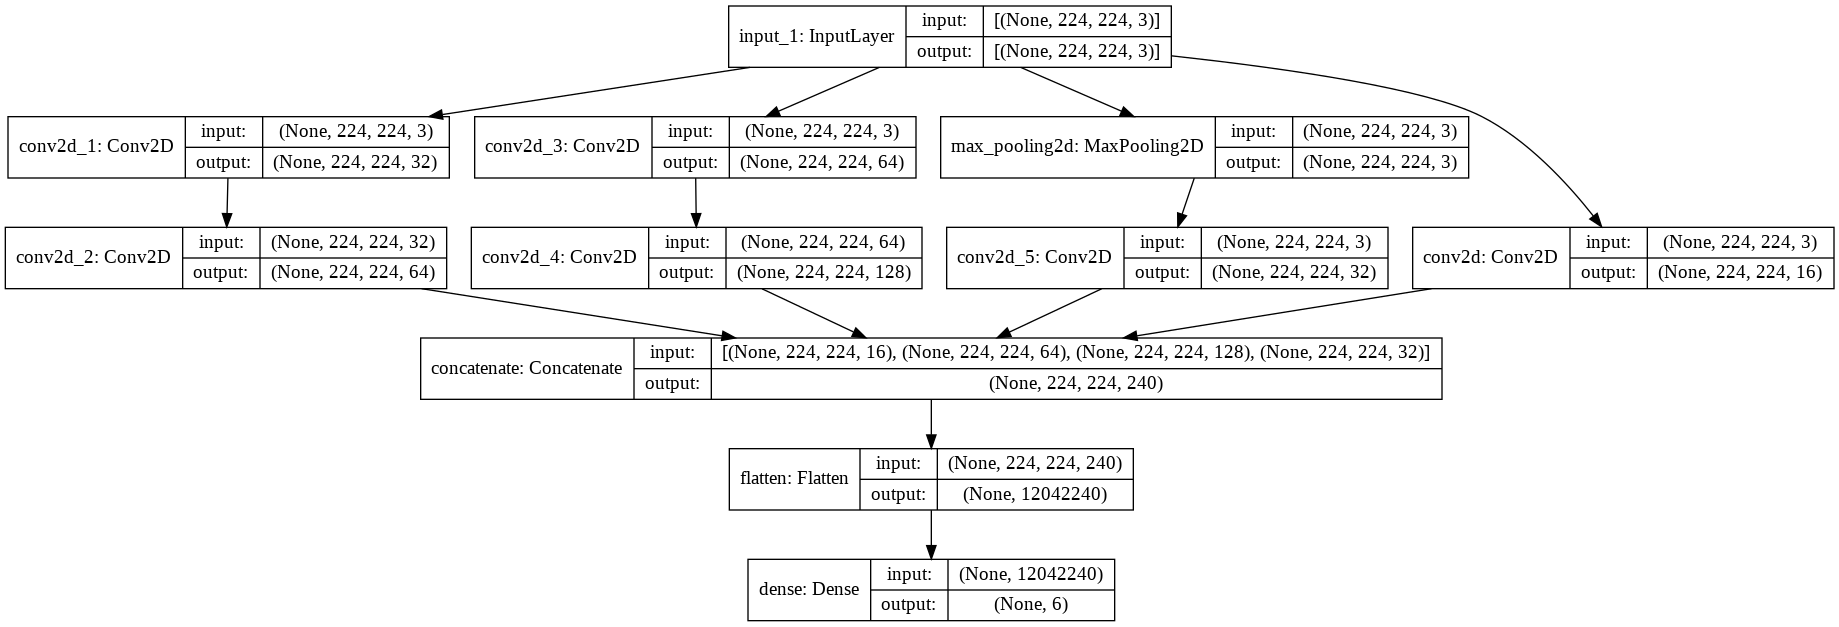

In [30]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/inception'+str(int(t))+'.png'
print(image_name)
plot_model(model,show_shapes=True,to_file=image_name)

In [31]:
## Compile The Model 

In [32]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the Model

In [35]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [36]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/200
30/30 [==============================] - 12s 411ms/step - loss: 6.0215 - accuracy: 0.4333 - val_loss: 5.8231 - val_accuracy: 0.3839
Epoch 2/200
30/30 [==============================] - 12s 411ms/step - loss: 6.0757 - accuracy: 0.3885 - val_loss: 6.3663 - val_accuracy: 0.4554
Epoch 3/200
30/30 [==============================] - 13s 415ms/step - loss: 6.0195 - accuracy: 0.4542 - val_loss: 6.0117 - val_accuracy: 0.4777
Epoch 4/200
30/30 [==============================] - 12s 411ms/step - loss: 5.9542 - accuracy: 0.4896 - val_loss: 5.9233 - val_accuracy: 0.4911
Epoch 5/200
30/30 [==============================] - 12s 406ms/step - loss: 6.1437 - accuracy: 0.4625 - val_loss: 5.7956 - val_accuracy: 0.4643
Epoch 6/200
30/30 [==============================] - 12s 405ms/step - loss: nan - accuracy: 0.4719 - val_loss: 6.1294 - val_accuracy: 0.5045
Epoch 7/200
30/30 [==============================] - 12s 404ms/step - loss: 6.0082 - accuracy: 0.5010 - val_loss: 6.1043 - val_accuracy: 0.

Text(0, 0.5, 'accuracy')

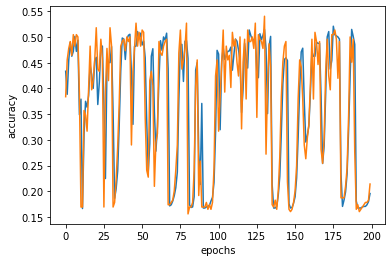

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')